In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/supportlytics_master_dataset.csv")
df.head()



,Ticket_ID,Ticket_Type,Priority,Category,Country,Cluster_Name,Similarity_Score,Created_Date,Resolved_Date,Status,Resolution_Duration
0,TKT00001,Problem,Critical,Bug,Canada,Data Sync,0.70,2024-05-26,2024-06-05,Open,10
1,TKT00002,Problem,Low,Security,Canada,Network Failure,0.81,2024-04-14,2024-04-16,Resolved,2
2,TKT00003,Incident,Medium,Network,India,Data Sync,0.81,2024-06-04,2024-06-12,Open,8
3,TKT00004,Problem,Low,Bug,USA,Data Sync,0.81,2024-05-28,2024-05-28,Resolved,0
4,TKT00005,Incident,Critical,Performance,Canada,UI Bugs,0.77,2024-05-23,2024-06-02,Open,10


In [ ]:
df.shape


(2000, 11)

In [ ]:
df.columns


Index(['Ticket_ID', 'Ticket_Type', 'Priority', 'Category', 'Country',
       'Cluster_Name', 'Similarity_Score', 'Created_Date', 'Resolved_Date',
       'Status', 'Resolution_Duration'],
      dtype='object')

In [ ]:
df.dtypes


,0
Ticket_ID,object
Ticket_Type,object
Priority,object
Category,object
Country,object
Cluster_Name,object
Similarity_Score,float64
Created_Date,object
Resolved_Date,object
Status,object


In [ ]:
df.isnull().sum()


,0
Ticket_ID,0
Ticket_Type,0
Priority,0
Category,0
Country,0
Cluster_Name,0
Similarity_Score,0
Created_Date,0
Resolved_Date,0
Status,0


In [ ]:
df['Ticket_Type'].value_counts()


,count
Ticket_Type,
Incident,689
Problem,675
Request,636


In [ ]:
df['Priority'].value_counts()


,count
Priority,
High,542
Medium,500
Critical,489
Low,469


In [ ]:
df['Category'].value_counts()


,count
Category,
Performance,352
Integration,351
Access,339
Security,336
Bug,330
Network,292


In [ ]:
df['Status'].value_counts()


,count
Status,
Resolved,1448
Open,552


In [ ]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'])


In [ ]:
df.dtypes


,0
Ticket_ID,object
Ticket_Type,object
Priority,object
Category,object
Country,object
Cluster_Name,object
Similarity_Score,float64
Created_Date,datetime64[ns]
Resolved_Date,datetime64[ns]
Status,object


In [ ]:
df['Resolution_Duration'].describe()


,Resolution_Duration
count,2000.00000
mean,5.09050
std,3.09291
min,0.00000
25%,2.00000
50%,5.00000
75%,8.00000
max,10.00000


In [ ]:
priority_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Critical': 4
}

df['Priority_Score'] = df['Priority'].map(priority_map)


In [ ]:
df[['Priority', 'Priority_Score']].head()


,Priority,Priority_Score
0,Critical,4
1,Low,1
2,Medium,2
3,Low,1
4,Critical,4


In [ ]:
df.isnull().sum()
df.head()


,Ticket_ID,Ticket_Type,Priority,Category,Country,Cluster_Name,Similarity_Score,Created_Date,Resolved_Date,Status,Resolution_Duration,Priority_Score
0,TKT00001,Problem,Critical,Bug,Canada,Data Sync,0.70,2024-05-26,2024-06-05,Open,10,4
1,TKT00002,Problem,Low,Security,Canada,Network Failure,0.81,2024-04-14,2024-04-16,Resolved,2,1
2,TKT00003,Incident,Medium,Network,India,Data Sync,0.81,2024-06-04,2024-06-12,Open,8,2
3,TKT00004,Problem,Low,Bug,USA,Data Sync,0.81,2024-05-28,2024-05-28,Resolved,0,1
4,TKT00005,Incident,Critical,Performance,Canada,UI Bugs,0.77,2024-05-23,2024-06-02,Open,10,4


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")
PLOTS_DIR = "milestone2_plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

In [8]:
FILE_NAME = "it_support_tickets_1000 1.csv"

df = pd.read_csv(FILE_NAME)

In [9]:
df["Created_Date"] = pd.to_datetime(df["Created_Date"], errors="coerce")
df["Resolved_Date"] = pd.to_datetime(df["Resolved_Date"], errors="coerce")


In [15]:
print("\n Dataset Loaded Successfully")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])



 Dataset Loaded Successfully
Rows: 1000 | Columns: 18


In [11]:
df["Resolution_Duration"] = (df["Resolved_Date"] - df["Created_Date"]).dt.days

# Fill unresolved ticket durations as NaN

In [12]:
priority_map = {"Low": 1, "Medium": 2, "High": 3, "Critical": 4}
df["Priority_Score"] = df["Priority"].map(priority_map)

# Similarity buckets

In [16]:
def similarity_bucket(x):
    if pd.isna(x):
        return "Unknown"
    if x >= 0.90:
        return "Very High"
    elif x >= 0.80:
        return "High"
    elif x >= 0.70:
        return "Medium"
    else:
        return "Low"

df["Similarity_Level"] = df["Similarity_Score"].apply(similarity_bucket)

print("\n Feature Engineering Done")
print(df[["Resolution_Duration", "Priority_Score", "Similarity_Level"]].head())


 Feature Engineering Done
   Resolution_Duration  Priority_Score Similarity_Level
0                  NaN               4              Low
1                  NaN               3           Medium
2                  NaN               2           Medium
3                  NaN               3           Medium
4                  NaN               4             High


In [17]:
print("\n Ticket Type Count:\n", df["Ticket_Type"].value_counts())
print("\n Priority Count:\n", df["Priority"].value_counts())
print("\n Category Count:\n", df["Category"].value_counts())
print("\n Country Count:\n", df["Country"].value_counts())


 Ticket Type Count:
 Ticket_Type
Request     407
Incident    404
Problem     189
Name: count, dtype: int64

 Priority Count:
 Priority
Medium      357
High        256
Low         253
Critical    134
Name: count, dtype: int64

 Category Count:
 Category
Security       232
Bug            201
Performance    198
Integration    188
Access         181
Name: count, dtype: int64

 Country Count:
 Country
USA          185
UK           174
Australia    171
India        161
Germany      157
France       152
Name: count, dtype: int64


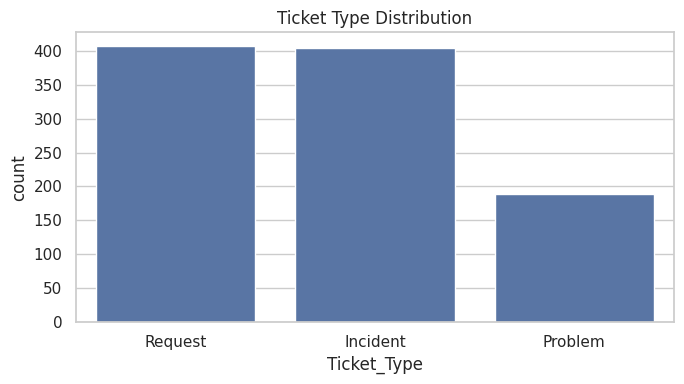

In [18]:
# VISUALIZATION 1: Ticket Type Distribution
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Ticket_Type", order=df["Ticket_Type"].value_counts().index)
plt.title("Ticket Type Distribution")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/1_ticket_type_distribution.png")
plt.show()

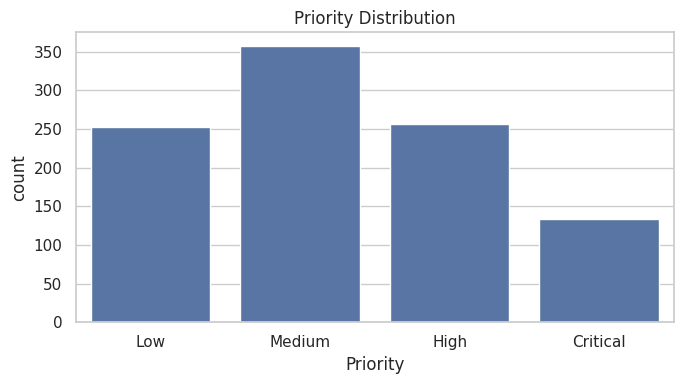

In [19]:
# VISUALIZATION 2: Priority Distribution
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Priority", order=["Low", "Medium", "High", "Critical"])
plt.title("Priority Distribution")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/2_priority_distribution.png")
plt.show()

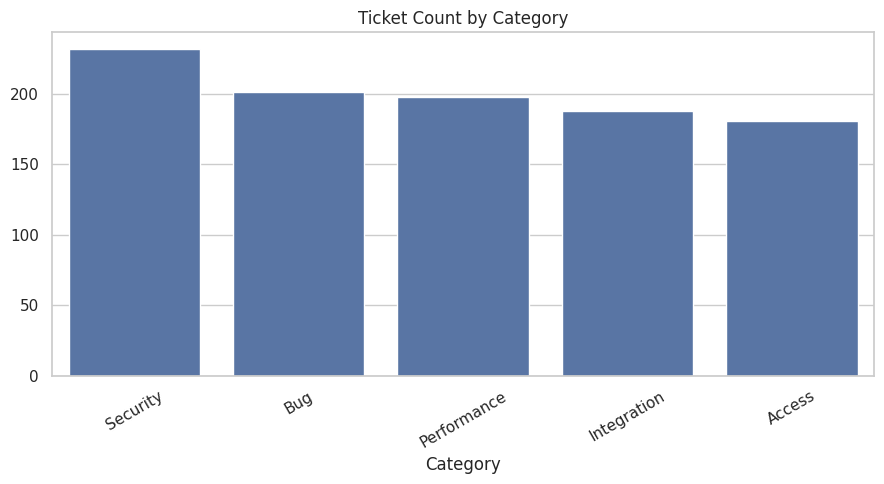

In [20]:
# VISUALIZATION 3: Top Categories
plt.figure(figsize=(9, 5))
top_categories = df["Category"].value_counts()
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Ticket Count by Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/3_category_distribution.png")
plt.show()

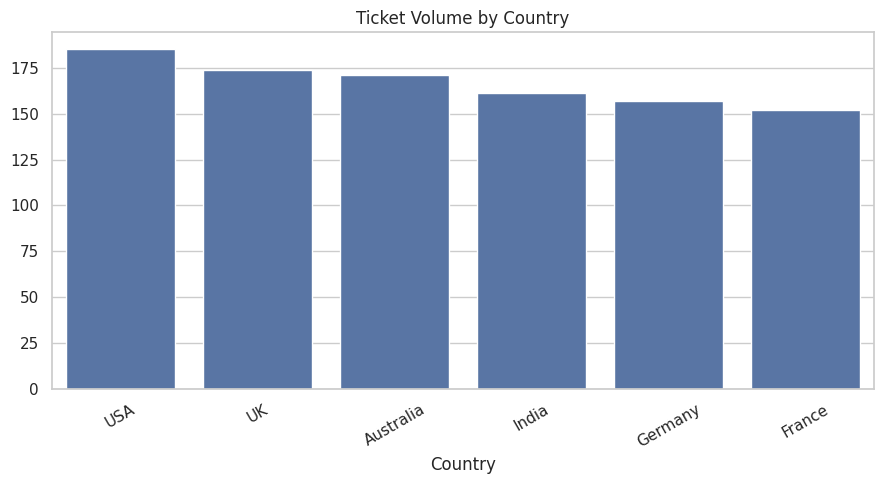

In [21]:
# VISUALIZATION 4: Ticket Volume by Country
plt.figure(figsize=(9, 5))
country_counts = df["Country"].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Ticket Volume by Country")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/4_ticket_by_country.png")
plt.show()

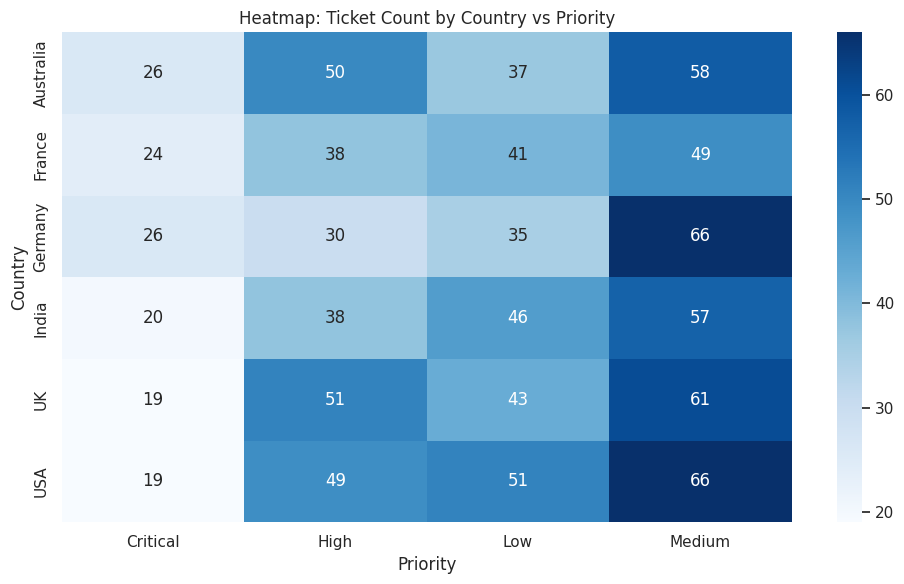

In [22]:
# VISUALIZATION 5: Heatmap (Priority vs Country)
pivot_pc = pd.pivot_table(
    df,
    values="Ticket_ID",
    index="Country",
    columns="Priority",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_pc, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: Ticket Count by Country vs Priority")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/5_heatmap_country_priority.png")
plt.show()

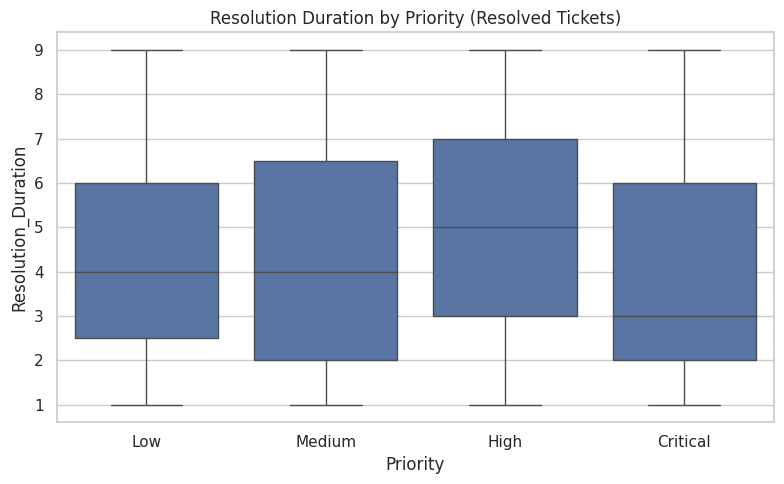

In [23]:
# VISUALIZATION 6: Average Resolution Duration by Priority
resolved_df = df[df["Status"] == "Resolved"].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(data=resolved_df, x="Priority", y="Resolution_Duration", order=["Low", "Medium", "High", "Critical"])
plt.title("Resolution Duration by Priority (Resolved Tickets)")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/6_resolution_by_priority.png")
plt.show()

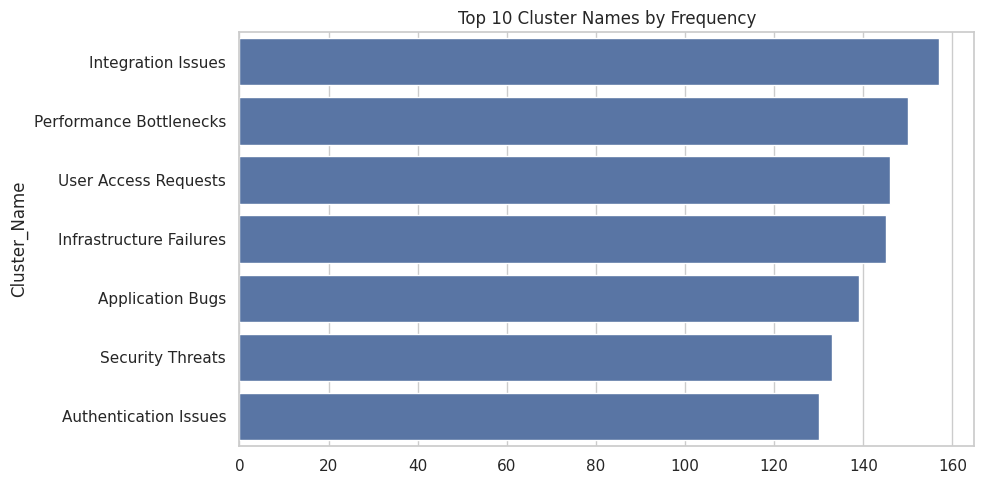

In [24]:
# VISUALIZATION 7: Cluster Frequency
plt.figure(figsize=(10, 5))
cluster_counts = df["Cluster_Name"].value_counts().head(10)
sns.barplot(x=cluster_counts.values, y=cluster_counts.index)
plt.title("Top 10 Cluster Names by Frequency")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/7_top_clusters.png")
plt.show()

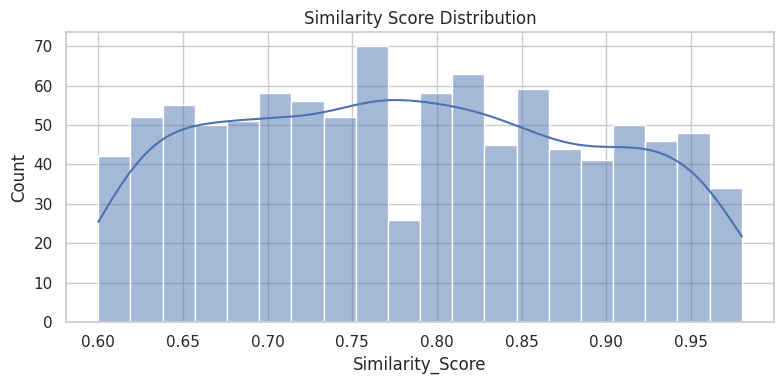

In [25]:
# VISUALIZATION 8: Similarity Score Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Similarity_Score"], bins=20, kde=True)
plt.title("Similarity Score Distribution")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/8_similarity_distribution.png")
plt.show()

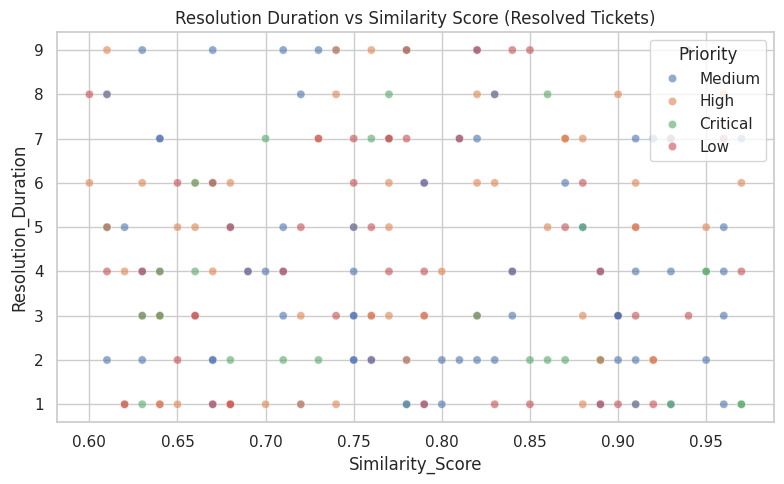

In [26]:
# VISUALIZATION 9 : Scatter plot Resolution vs Similarity
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=resolved_df,
    x="Similarity_Score",
    y="Resolution_Duration",
    hue="Priority",
    alpha=0.6
)
plt.title("Resolution Duration vs Similarity Score (Resolved Tickets)")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/9_resolution_vs_similarity.png")
plt.show()

In [27]:
# CLUSTER + SIMILARITY ANALYSIS
print("\n Cluster + Similarity Insights")

cluster_summary = resolved_df.groupby(["Cluster_ID", "Cluster_Name"]).agg(
    Ticket_Count=("Ticket_ID", "count"),
    Avg_Resolution_Days=("Resolution_Duration", "mean"),
    Avg_Similarity=("Similarity_Score", "mean")
).sort_values(by="Ticket_Count", ascending=False)

print("\n  Cluster Summary (Top 10):\n")
print(cluster_summary.head(10))

# Save summary to CSV
cluster_summary.to_csv("milestone2_cluster_summary.csv")
print("\n  Cluster Summary Saved: milestone2_cluster_summary.csv")


 Cluster + Similarity Insights

  Cluster Summary (Top 10):

                                    Ticket_Count  Avg_Resolution_Days  \
Cluster_ID Cluster_Name                                                 
6          Performance Bottlenecks           128             3.880000   
5          Integration Issues                125             4.266667   
2          User Access Requests              125             3.678571   
3          Infrastructure Failures           120             4.972222   
4          Application Bugs                  114             4.611111   
1          Authentication Issues             110             4.642857   
7          Security Threats                  102             3.740741   

                                    Avg_Similarity  
Cluster_ID Cluster_Name                             
6          Performance Bottlenecks        0.796719  
5          Integration Issues             0.778880  
2          User Access Requests           0.779280  
3          Infr

In [28]:
# PERFORMANCE GAP IDENTIFICATION
slow_clusters = cluster_summary.sort_values(by="Avg_Resolution_Days", ascending=False).head(5)
print("\n  Slowest Clusters (Need Improvement):\n")
print(slow_clusters)

slow_clusters.to_csv("milestone2_slowest_clusters.csv")
print("\n Slow Cluster Report Saved: milestone2_slowest_clusters.csv")

print(f"\n All plots saved in folder: {PLOTS_DIR}")


  Slowest Clusters (Need Improvement):

                                    Ticket_Count  Avg_Resolution_Days  \
Cluster_ID Cluster_Name                                                 
3          Infrastructure Failures           120             4.972222   
1          Authentication Issues             110             4.642857   
4          Application Bugs                  114             4.611111   
5          Integration Issues                125             4.266667   
6          Performance Bottlenecks           128             3.880000   

                                    Avg_Similarity  
Cluster_ID Cluster_Name                             
3          Infrastructure Failures        0.797250  
1          Authentication Issues          0.774545  
4          Application Bugs               0.775088  
5          Integration Issues             0.778880  
6          Performance Bottlenecks        0.796719  

 Slow Cluster Report Saved: milestone2_slowest_clusters.csv

 All plots sav